C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


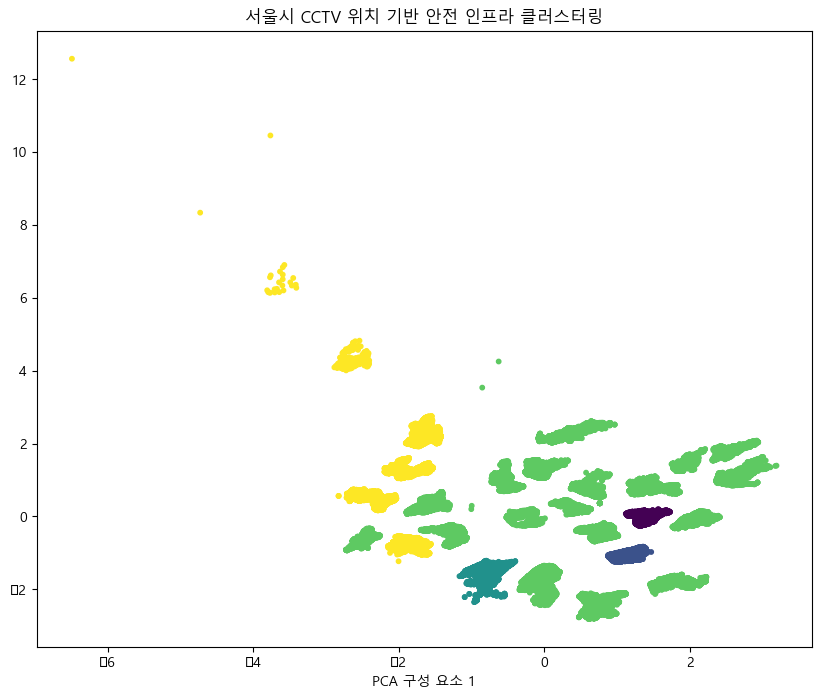

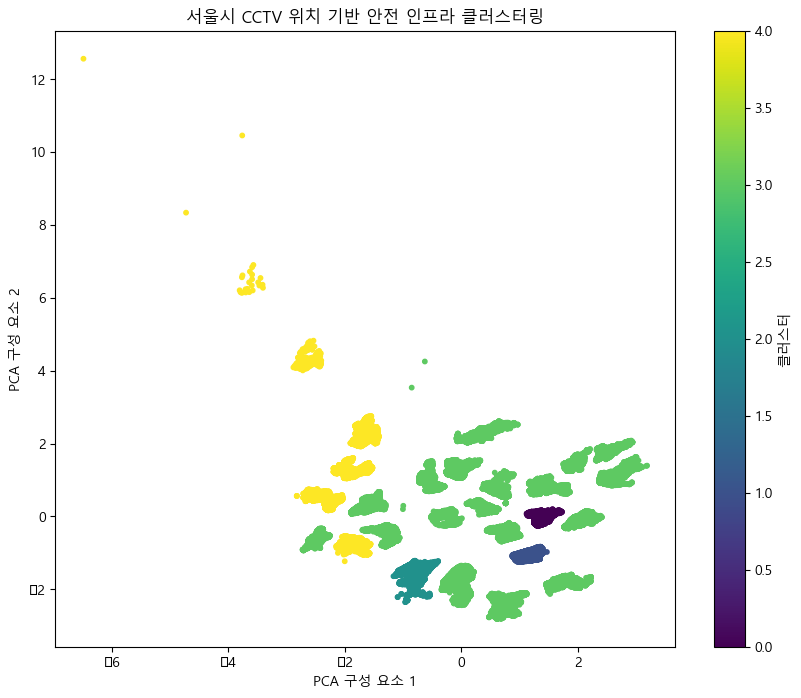

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

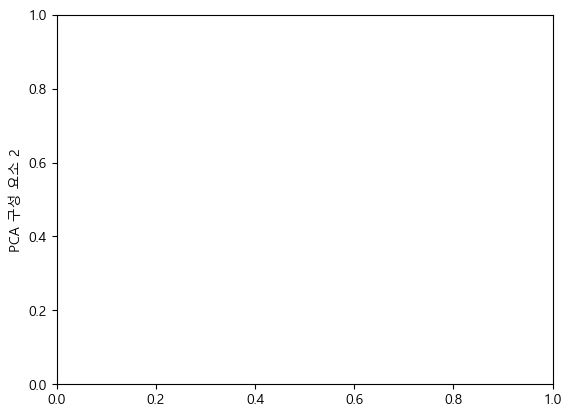

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  # 숫자 포맷을 하기 위한 모듈

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 맑은 고딕 추천

# 그래프 생성
plt.figure(figsize=(10, 8))
plt.scatter(cctv_df['pca_1'], cctv_df['pca_2'], c=cctv_df['cluster'], cmap='viridis', s=10)
plt.title("서울시 CCTV 위치 기반 안전 인프라 클러스터링")
plt.xlabel("PCA 구성 요소 1")# 필요한 라이브러리 임포트 시킨다
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')  

# CCTV 데이터 로드 하기기
file_path = '../data/서울시 안심이 CCTV 연계 현황.csv'
cctv_df = pd.read_csv(file_path, encoding='cp949')

# 필요한 컬럼 선택 및 원핫 인코딩 하기
cctv_df_selected = cctv_df[['자치구', '위도', '경도', 'CCTV 수량']]
cctv_df_encoded = pd.get_dummies(cctv_df_selected, columns=['자치구'])

# 정규화 하기
scaler = StandardScaler()
cctv_df_scaled = scaler.fit_transform(cctv_df_encoded)

# 정규화된 데이터를 DataFrame으로 변환하기
cctv_df = pd.DataFrame(cctv_df_scaled, columns=cctv_df_encoded.columns)

# K-means 클러스터링 모델 설정하기
kmeans = KMeans(n_clusters=5, random_state=0)
cctv_df['cluster'] = kmeans.fit_predict(cctv_df_scaled)

# PCA를 사용하여 2차원으로 차원 축소 하기
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cctv_df_scaled)
cctv_df['pca_1'] = reduced_data[:, 0]
cctv_df['pca_2'] = reduced_data[:, 1]

# 클러스터링 결과 시각화 시키기
plt.figure(figsize=(10, 8))
plt.scatter(cctv_df['pca_1'], cctv_df['pca_2'], c=cctv_df['cluster'], cmap='viridis', s=10)
plt.title("서울시 CCTV 위치 기반 안전 인프라 클러스터링")
plt.xlabel("PCA 구성 요소 1")
plt.ylabel("PCA 구성 요소 2")
plt.colorbar(label='클러스터')
plt.show()

plt.ylabel("PCA 구성 요소 2")
plt.colorbar(label='클러스터')
plt.show()
